# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2022-02-05 10:20:50--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.3’

test.dat.3          100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-02-05 10:20:50 (181 MB/s) - ‘test.dat.3’ saved [2844/2844]

--2022-02-05 10:20:50--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.3’

train.dat.3         100%[===================>]  10.98K  --.-KB/s    in 0s      

2022-02-05 10:20:50 (112 MB/s) - ‘train.dat.3’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re

In [4]:

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


In [5]:
# Create dot product function
def dot_product(array1, array2):
    product = 0
    for array1, array2 in zip(array1, array2):
        product = product + (array1 * array2)
    return product 

In [6]:
# Create a function to calcuclate sigmoid function
def sigmoid(x):
    value = 1 / (1 + math.exp(-x))
    return value

In [7]:
# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    out = sigmoid(dot_product(instance, weight))
    return out

In [8]:
# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    out = sigmoid(dot_product(instance, weights))
    if out >= 0.5:
        return 1
    else:
        return 0

In [9]:
# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

In [10]:
# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # Intializing the weights
    weights = [0] * (len(instances[0])-1)

    for e in range(epochs):
        for instance in instances:
            # Calculating error
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            # Updating weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [11]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

In [12]:
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




Predict function rounds off the value and would result in 1 or 0 whereas we need the output value in decimals so we can calculate the difference and modify weights for the next epoch. When we use dot_product and sigmoid function seperately, we get results in decimal which can help determine the error and calculate new weights for the next epoch.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [73]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
final_data = {'Percent Dataset': [],
              'Learning Rate': [],
              'Epochs': [],
              'Accuracy': []}

In [74]:
for tr_size in tr_percent:
  for lr in lr_array:
    for epochs in num_epochs:
      size =  round(len(instances_tr) * tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      final_data['Percent Dataset'].append(tr_size)
      final_data['Learning Rate'].append(round(lr,3))
      final_data['Epochs'].append(epochs)
      final_data['Accuracy'].append(round(accuracy,1))
      print(f"#tr: {len(pre_instances):0}, learning rate: {lr:.3f}, epochs: {epochs:3}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
      

#tr: 20, learning rate: 0.005, epochs:   5; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.005, epochs:  10; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.005, epochs:  20; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.005, epochs:  50; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.005, epochs: 100; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.010, epochs:   5; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.010, epochs:  10; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.010, epochs:  20; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.010, epochs:  50; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.010, epochs: 100; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.050, epochs:   5; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.050, epochs:  10; Accuracy (test, 100 instances): 68.0
#tr: 20, learning rate: 0.05

In [63]:
final_df = pd.DataFrame(final_data)
final_df

,Percent Dataset,Learning Rate,Epochs,Accuracy
0,5,0.005,5,68.0
1,5,0.005,10,68.0
2,5,0.005,20,68.0
3,5,0.005,50,68.0
4,5,0.005,100,68.0
...,...,...,...,...
121,100,0.050,20,80.0
122,100,0.050,50,80.0
123,100,0.050,100,80.0
124,100,0.050,200,80.0


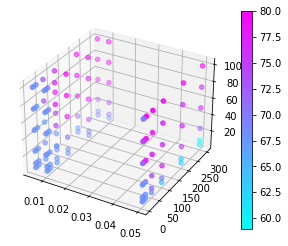

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = final_df["Learning Rate"]
y = final_df["Epochs"]
z = final_df["Percent Dataset"]
c = final_df["Accuracy"]

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)
plt.show()

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



A: Yes we need to train with all the training dataset as the graph above shows that the Accuracy increases with increase in dataset percentage. More samples help the model to learn the pattern and make better decisions on test dataset.

B: Because the learning rate dropped which didn't allow the accuracy to reach to the maximum as there were just not enough epochs for given learning rate.

C: There are only three things that can be changed in a single perceptron model which has been modified here in our example which means that there can't be any other new hyperparameter that can be modified. Now we can look at the same hyperparameters with larger number of epochs for smaller learning rate which could result in better accuracy for the given model than what we have seen for given learning rate but even those accuracy would stop at '80.0'.

D: No it is not worth training for more epochs as the graph above shows that for given learning rate and dataset percentage, number of epochs suitable are more in the middle of the range when the learning rate is highest. It could be worth training for larger number of epochs if the learning rate is very low as it will take the model longer to make significant adjustment in error with smaller learning rate but smaller learning rate does help the model to have better prediction especially in a neural network.